In [332]:
'''
LTSTM 분류기

Yolo - 사진 객체 추출

다음주

- 어텐션, 트랜스포머, BERT, GPT
- 파인튜닝 => 이미지(cnn), 텍스트(bert, gpt)
- yolo 개인 데이터 객체 추출
- tableau 기초, 대시보드

다음주 이후

html, javascript, flask, db

프로젝트 예정

파이널 프로젝트 기간
-오전수업 오후 프로젝트
-GAN, 강화학습, 메타러닝 등
'''

'\nLTSTM 분류기\n\nYolo - 사진 객체 추출\n\n다음주\n\n- 어텐션, 트랜스포머, BERT, GPT\n- 파인튜닝 => 이미지(cnn), 텍스트(bert, gpt)\n- yolo 개인 데이터 객체 추출\n- tableau 기초, 대시보드\n\n다음주 이후\n\nhtml, javascript, flask, db\n\n프로젝트 예정\n\n파이널 프로젝트 기간\n-오전수업 오후 프로젝트\n-GAN, 강화학습, 메타러닝 등\n'

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [334]:
data = pd.read_csv('archive/spam.csv', encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [335]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [336]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [337]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [338]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [339]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 5169


In [340]:
data.drop_duplicates(subset=['v2'], inplace=True) # v2 에서 중복된 값들 제거하고 저장

In [341]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int64 
 1   v2      5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [342]:
data.groupby('v1').count()

,v2
v1,
0,4516
1,653


In [343]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [344]:
X_data = data['v2']
y_data = data['v1']

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [346]:
X_train

1882                     Sorry, I can't help you on this.
4948                    I am in bus on the way to calicut
4460    Thanks again for your reply today. When is ur ...
4851                               I liked your new house
201     Hello darlin ive finished college now so txt m...
                              ...                        
1971                          Enjoy ur life. . Good night
3701    Hey loverboy! I love you !! I had to tell ... ...
2809                 Mm so you asked me not to call radio
1229                      Jus ans me lar. U'll noe later.
2531    What's happening with you. Have you gotten a j...
Name: v2, Length: 4135, dtype: object

In [347]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [348]:
y_train

1882    0
4948    0
4460    0
4851    0
201     0
       ..
1971    0
3701    0
2809    0
1229    0
2531    0
Name: v1, Length: 4135, dtype: int64

In [349]:
y_test

4183    0
108     0
5237    1
1858    0
3603    0
       ..
2086    0
5548    0
2254    0
3593    1
1174    0
Name: v1, Length: 1034, dtype: int64

In [350]:
tokenizer = Tokenizer()

In [351]:
tokenizer
tokenizer.fit_on_texts(X_train)
#코퍼스에 있는 텍스트 데이터로부터 토크나이저를 생성

In [352]:
len(tokenizer.index_word)

7821

In [353]:
tokenizer.index_word

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'have',
 17: 'on',
 18: 'call',
 19: 'that',
 20: 'are',
 21: '2',
 22: 'now',
 23: 'so',
 24: 'but',
 25: 'not',
 26: 'can',
 27: 'or',
 28: "i'm",
 29: 'get',
 30: 'at',
 31: 'do',
 32: 'if',
 33: 'be',
 34: 'will',
 35: 'just',
 36: 'with',
 37: 'we',
 38: 'no',
 39: 'this',
 40: 'ur',
 41: 'up',
 42: '4',
 43: 'how',
 44: 'gt',
 45: 'lt',
 46: 'go',
 47: 'when',
 48: 'from',
 49: 'what',
 50: 'ok',
 51: 'out',
 52: 'know',
 53: 'free',
 54: 'all',
 55: 'like',
 56: 'then',
 57: 'got',
 58: 'good',
 59: 'am',
 60: 'time',
 61: 'was',
 62: 'come',
 63: 'its',
 64: 'love',
 65: 'want',
 66: 'text',
 67: 'he',
 68: 'only',
 69: 'there',
 70: 'day',
 71: 'need',
 72: 'going',
 73: 'lor',
 74: 'send',
 75: 'one',
 76: 'as',
 77: 'home',
 78: 'about',
 79: 'back',
 80: 'still',
 81: 'k',
 82: 'see',
 83: 'txt',
 84: 'by',
 85: 

In [354]:
tokenizer.word_counts

OrderedDict([('sorry', 101),
             ('i', 1832),
             ("can't", 47),
             ('help', 44),
             ('you', 1644),
             ('on', 404),
             ('this', 258),
             ('am', 171),
             ('in', 664),
             ('bus', 22),
             ('the', 1003),
             ('way', 75),
             ('to', 1679),
             ('calicut', 2),
             ('thanks', 65),
             ('again', 55),
             ('for', 525),
             ('your', 519),
             ('reply', 105),
             ('today', 108),
             ('when', 221),
             ('is', 643),
             ('ur', 256),
             ('visa', 1),
             ('coming', 41),
             ('and', 754),
             ('r', 113),
             ('u', 859),
             ('still', 125),
             ('buying', 5),
             ('gucci', 1),
             ('bags', 2),
             ('my', 551),
             ('sister', 13),
             ('things', 31),
             ('are', 383),
             ('no

In [355]:
X_train_encoded = tokenizer.texts_to_sequences(X_train)
print(X_train_encoded)

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407], [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3], [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112], [171, 16, 3, 522, 1155, 12, 104, 449], [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180], [709, 223, 115, 1, 390, 2, 89, 3, 25, 2, 89, 10, 13, 1812, 166, 14, 316, 130, 10, 1313, 24, 63, 3489, 10, 23, 157, 12, 3490], [140, 1, 1156, 4, 710, 15, 566, 17, 1314, 349, 80, 711, 624, 119, 28, 35, 1315, 41], [58, 280, 34, 31], [145, 3, 128, 1, 111, 3, 26, 252, 13, 44, 3491, 22, 2, 2330, 25, 173, 24, 32, 349, 469, 1, 26, 230, 172, 10, 52, 24, 47, 3, 31, 33, 173, 3, 20, 281], [3

In [356]:
word_to_index = tokenizer.word_index #등장 많이한 수
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [357]:
tokenizer.word_counts.items()

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [358]:
total_cnt = len(word_to_index)

In [359]:
threshold = 2 # 등장 수 지정

In [360]:
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [361]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [362]:
total_freq

65145

In [363]:
rare_cnt

4337

In [364]:
rare_freq

4337

In [365]:
rare_cnt/total_cnt # 전체 단어에서 등장 빈도수가 1번인 단어의 비율

0.5545326684567191

In [366]:
(rare_freq/total_freq)*100 # 전체 등장 빈도에서 등장 빈도수가 1번인 단어 등장 비율

6.65745644331875

In [367]:
tokenizer_over2 = Tokenizer(num_words=total_cnt-rare_cnt+1)
tokenizer_over2.fit_on_texts(X_train)

In [368]:
total_cnt

7821

In [369]:
rare_cnt

4337

In [370]:
total_cnt-rare_cnt

3484

In [371]:
len(tokenizer_over2.index_word)

7821

In [372]:
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer3 = Tokenizer(num_words=5)

In [373]:
tokenizer3.fit_on_texts(sentences)
word_index = tokenizer3.word_index
word_index

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}

In [374]:
seq = tokenizer3.texts_to_sequences(sentences)
print(word_index)  # {'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
print(seq)

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2, 4], [3, 1, 2], [1, 2, 4]]


In [375]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [376]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))

메일의 최대 길이 : 189


In [377]:
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
# 전체 메일 제목의 길이의 합 / 전체 메일의 길이

메일의 평균 길이 : 15.754534


(array([1.390e+02, 1.361e+03, 9.540e+02, 6.010e+02, 4.370e+02, 2.840e+02,
        2.970e+02, 3.580e+02, 5.460e+02, 6.700e+01, 2.700e+01, 1.400e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.300e+01, 8.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

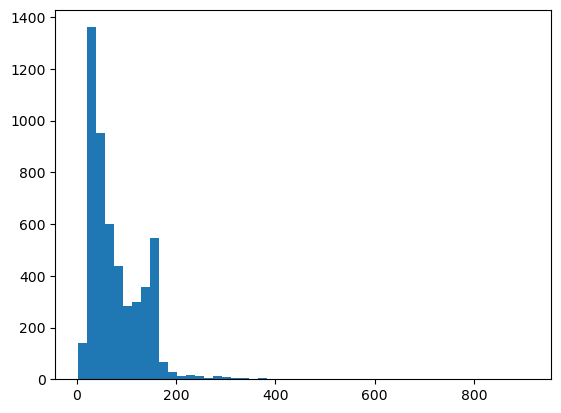

In [378]:
plt.hist([len(sample) for sample in X_data], bins=50)

In [379]:
X_train_padded = pad_sequences(X_train_encoded, maxlen =189)

In [380]:
X_train_padded.shape

(4135, 189)

In [381]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

In [382]:
vocab_size=len(word_to_index)+1 # 패딩 토큰 0번이 사용되므로 1을 더함
vocab_size

7822

In [383]:
X_train_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [384]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) # 7822 -> 32 차원
model.add(SimpleRNN(hidden_units))
model.add(Dense(1, activation='sigmoid'))

In [385]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2)

Epoch 1/4
52/52 [==============================] - 2s 29ms/step - loss: 0.4844 - acc: 0.7978 - val_loss: 0.3939 - val_acc: 0.8779
Epoch 2/4
52/52 [==============================] - 1s 21ms/step - loss: 0.2817 - acc: 0.9060 - val_loss: 0.1738 - val_acc: 0.9577
Epoch 3/4
52/52 [==============================] - 1s 20ms/step - loss: 0.1399 - acc: 0.9616 - val_loss: 0.1068 - val_acc: 0.9698
Epoch 4/4
52/52 [==============================] - 1s 20ms/step - loss: 0.0893 - acc: 0.9782 - val_loss: 0.0803 - val_acc: 0.9770


In [386]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [387]:
tokenizer.texts_to_sequences(X_test)

[[1, 35, 144, 71, 376, 194, 169, 7, 1, 52, 3, 619, 33, 1520, 194, 55, 314],
 [1,
  52,
  545,
  318,
  11,
  979,
  61,
  55,
  3,
  302,
  25,
  33,
  56,
  180,
  1,
  59,
  248,
  5,
  75,
  2,
  442],
 [3,
  52,
  9,
  305,
  2,
  219,
  3,
  1153,
  94,
  854,
  286,
  2,
  179,
  51,
  151,
  14,
  211,
  33,
  18,
  48,
  13,
  106,
  27,
  420],
 [364, 1, 59, 251, 12, 13, 18],
 [107, 195, 49, 3, 62, 2, 143, 408],
 [133, 8, 131, 29],
 [53,
  593,
  8,
  21,
  4,
  1021,
  893,
  2,
  224,
  1603,
  841,
  4720,
  324,
  5626,
  66,
  2,
  2,
  411,
  593,
  656,
  1197,
  83,
  461,
  209,
  727,
  396],
 [140, 24, 1, 90, 201, 1, 71, 3, 409, 445],
 [50, 269, 2, 31, 121, 276, 899, 8],
 [64, 14, 1, 65, 2, 19, 932, 1583, 36, 909],
 [410, 1, 16, 4, 104, 3252, 22],
 [223,
  50,
  1,
  4825,
  8,
  2,
  143,
  705,
  170,
  7,
  95,
  178,
  1207,
  114,
  8,
  20,
  3,
  187,
  614,
  39,
  397,
  828],
 [1, 65, 711, 150, 35, 3831, 7],
 [59, 558, 34, 235, 33, 189, 54, 5, 261],
 [145,

In [388]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen =189)

In [389]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 6ms/step - loss: 0.0807 - acc: 0.9768

 테스트 정확도: 0.9768


In [390]:
X_test_padded
X_test_padded.shape

(1034, 189)

In [391]:
# '고객님 이번에 세일을 합니다. 방문해주세요.'
# -> 토큰화 -> 수치변환 -> 패딩 -> 모델입력 -> 결과

# 웹앱형식 서비스

In [392]:
pred = model.predict(X_test_padded)

33/33 [==============================] - 0s 5ms/step


In [393]:
X_test_encoded

[[1, 35, 144, 71, 376, 194, 169, 7, 1, 52, 3, 619, 33, 1520, 194, 55, 314],
 [1,
  52,
  545,
  318,
  11,
  979,
  61,
  55,
  3,
  302,
  25,
  33,
  56,
  180,
  1,
  59,
  248,
  5,
  75,
  2,
  442],
 [3,
  52,
  9,
  305,
  2,
  219,
  3,
  1153,
  94,
  854,
  286,
  2,
  179,
  51,
  151,
  14,
  211,
  33,
  18,
  48,
  13,
  106,
  27,
  420],
 [364, 1, 59, 251, 12, 13, 18],
 [107, 195, 49, 3, 62, 2, 143, 408],
 [133, 8, 131, 29],
 [53,
  593,
  8,
  21,
  4,
  1021,
  893,
  2,
  224,
  1603,
  841,
  4720,
  324,
  5626,
  66,
  2,
  2,
  411,
  593,
  656,
  1197,
  83,
  461,
  209,
  727,
  396],
 [140, 24, 1, 90, 201, 1, 71, 3, 409, 445],
 [50, 269, 2, 31, 121, 276, 899, 8],
 [64, 14, 1, 65, 2, 19, 932, 1583, 36, 909],
 [410, 1, 16, 4, 104, 3252, 22],
 [223,
  50,
  1,
  4825,
  8,
  2,
  143,
  705,
  170,
  7,
  95,
  178,
  1207,
  114,
  8,
  20,
  3,
  187,
  614,
  39,
  397,
  828],
 [1, 65, 711, 150, 35, 3831, 7],
 [59, 558, 34, 235, 33, 189, 54, 5, 261],
 [145,

In [394]:
pred.shape

(1034, 1)

In [395]:
y_train

1882    0
4948    0
4460    0
4851    0
201     0
       ..
1971    0
3701    0
2809    0
1229    0
2531    0
Name: v1, Length: 4135, dtype: int64

In [396]:
'''
모델에 대한 정성적 평가

XAI = explainable AI

스팸/햄 메일 분류기 자동화

- 데이터 수집 -> 전처리 -> 분석 -> 시각화 -> 모델링 -> 배포 -> 성능 개선

- 기존 모델에 새롭게 수집된 데이터를 추가하여 학습(파인튜닝)

- 0.01  -> 0, 0.4999 -> 0,  0.5000 -> 1
'''

'\n모델에 대한 정성적 평가\n\nXAI = explainable AI\n\n스팸/햄 메일 분류기 자동화\n\n- 데이터 수집 -> 전처리 -> 분석 -> 시각화 -> 모델링 -> 배포 -> 성능 개선\n\n- 기존 모델에 새롭게 수집된 데이터를 추가하여 학습(파인튜닝)\n\n- 0.01  -> 0, 0.4999 -> 0,  0.5000 -> 1\n'

In [397]:
from konlpy.tag import Okt

In [398]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [399]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x2a438be7310>)

In [400]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [401]:
total_data = total_data.head(10000)

In [402]:
total_data.ratings>3

0        True
1       False
2        True
3       False
4        True
        ...  
9995    False
9996     True
9997    False
9998    False
9999    False
Name: ratings, Length: 10000, dtype: bool

In [403]:
total_data['label'] = np.select([total_data.ratings>3], [1], default=0) # total_data.ratings가 3보다 크면 1로

In [404]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [405]:
np.select([x<3, x>7], [x**2, x**3], default=999) # 3보다 작은 경우 제곱, 7보다 큰 경우 3제곱

array([  0,   1,   4, 999, 999, 999, 999, 999, 512, 729])

In [406]:
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
9995,1,기대를 너무 많이했나봐요 ........ 일단 머릿결 상하신 분은 고민좀 해보세요 ...,0
9996,5,너무 귀엽고 폭신폭신하고 예뻐요,1
9997,1,눈뒤에 실거는부분이커서 다뜨고 눈을붙일수가없네요 ㅜ,0
9998,2,짜증 옷이 뒤틀려서 왔음. 짜증 ㄷ신ㅅㅇㅌㄹ츤ㅅㄴㅅㅌㅅ가ㅡㅡㅎㄱㄴㅅ듣ㅅㄱᆞㄷ쑈는핟ㅎ...,0


In [407]:
total_data['label']=np.select([total_data.ratings>3], [1], default=0)

In [408]:
total_data['ratings'].nunique()

4

In [409]:
total_data['reviews'].nunique()

10000

In [410]:
total_data.drop_duplicates(subset=['reviews'], inplace=True)

In [411]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

In [412]:
train_data['reviews']

4901                     두께가 좀 얇네요. 물을 많이 흡수 할 수 있을까 싶어요.
4375    진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...
6698                           우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ
9805    원래 이런 모양인가요 ? 아무리봐도 덜박은거 같거든요...... 바느질했다가 뜯어진...
1101                      재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다
                              ...                        
5734                      서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요
5191                                  재구매 네번째 재구매 상품입니다~~
5390    핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 '삼가 고인의 ...
860                                   사이즈도 정사이즈인거같고 핏도이뻐요
7270    배송지가 삼천포가 아닌 것 같네요~ 매우 실망입니다.. 맛도 1년전에 지인을 통해 ...
Name: reviews, Length: 7500, dtype: object

In [413]:
train_data['reviews'] = train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')

C:\Users\user\AppData\Local\Temp\ipykernel_12396\2219532687.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['reviews'] = train_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')


In [414]:
train_data['reviews'].replace('', np.nan, inplace=True)

In [415]:
train_data.isnull().sum()

ratings    0
reviews    0
label      0
dtype: int64

In [416]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews'] = test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')
test_data['reviews'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

C:\Users\user\AppData\Local\Temp\ipykernel_12396\1079489571.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews'] = test_data['reviews'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','')


In [417]:
len(test_data)

2500

In [418]:
test_data

,ratings,reviews,label
6252,5,ㅎㅎ 가격에 비해 저렴하고 좋네요ㅎㅎ다음에 기회가 되면 또 구해 하겟습니다 번창하세...,1
4684,1,배송이 일걸린듯,0
1731,5,너무 좋아요 그리고 좋아요 그리고 좋아요,1
4742,4,검댕이는 묻어나지만 냄새는 다빠졌어요,1
4521,2,별로예요 ㅜㅜ 너무 약해서 한번쓰고 버렸습니다,0
...,...,...,...
4862,1,허리가 말도안되게작아서 못입겠어요,0
7025,1,상품배송할때 제품검수좀 하고 보내세요 의자 발 센치는 옮폭 파여서 왔던데 환불할려다...,0
7647,4,좀 얇다는 점이 아쉽네요,1
7161,4,촉촉하고 건조하지 않습니다 저렴하게 구매해서 만족합니다,1


In [419]:
okt=Okt()

In [420]:
okt.morphs('배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요')

['배송',
 '도',
 '빠르네요',
 '가격',
 '대비',
 '좋은',
 '것',
 '같아요',
 '첨',
 '에는',
 '힘들어하나',
 '조금',
 '지나니',
 '잘',
 '하네요']

In [421]:
okt.pos('배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요')

[('배송', 'Noun'),
 ('도', 'Josa'),
 ('빠르네요', 'Adjective'),
 ('가격', 'Noun'),
 ('대비', 'Noun'),
 ('좋은', 'Adjective'),
 ('것', 'Noun'),
 ('같아요', 'Adjective'),
 ('첨', 'Noun'),
 ('에는', 'Josa'),
 ('힘들어하나', 'Adjective'),
 ('조금', 'Noun'),
 ('지나니', 'Verb'),
 ('잘', 'Verb'),
 ('하네요', 'Verb')]

In [422]:
train_data, test_data reviews 열에서 'Noun', 'Verb' 추출하여 'NV' 열에 추가하여 저장

SyntaxError: invalid syntax (4094076207.py, line 1)

In [423]:
okt.pos(train_data['reviews'][1])

[('택배', 'Noun'),
 ('가', 'Josa'),
 ('엉망', 'Noun'),
 ('이네', 'Josa'),
 ('용', 'Noun'),
 ('저희', 'Modifier'),
 ('집', 'Noun'),
 ('밑', 'Noun'),
 ('에', 'Josa'),
 ('층', 'Noun'),
 ('에', 'Josa'),
 ('말', 'Noun'),
 ('도', 'Josa'),
 ('없이', 'Adverb'),
 ('놔두고가고', 'Verb')]

In [424]:
okt.pos(train_data['reviews'].iloc

SyntaxError: incomplete input (1889250665.py, line 1)

In [425]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [426]:
train_data['tokenized'] = train_data['reviews'].apply(okt.morphs)
train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

4901              [두께, 좀, 얇네요, 물, 많이, 흡수, 할, 수, 있을까, 싶어요]
4375    [진짜, 별로, 마감, 별로, 규격, 너무, 벌어져서, 그, 사이, 로, 빗물, 아...
6698      [우리, 아이, 워낙, 손, 마니, 쓰는, 편이, 라, 금방, 뜯어, 버리네요, ㅠ]
9805    [원래, 이런, 모양, 인가요, 아무리, 봐도, 덜, 박은거, 같거든요, 바느질, ...
1101       [재구매, 매주, 주말, 술안주, 용, 으로, 주문, 해서, 맛있게, 먹고있습니다]
                              ...                        
5734           [서랍, 정리, 진짜, 좋아요, 깔끔한게, 열, 때, 마다, 기분, 좋아요]
5191                              [재구매, 번째, 재구매, 상품, 입니다]
5390    [핸드폰, 으로, 주문, 하다, 보니, 한자, 입력, 어려운데, 한글, 로, 문구,...
860                         [사이즈, 정사, 이즈, 인거, 같고, 핏, 이뻐요]
7270    [배송지, 삼천포, 아닌, 것, 같네요, 매우, 실망, 입니다, 맛, 년전, 지인,...
Name: tokenized, Length: 7500, dtype: object

In [427]:
from collections import Counter #

In [428]:
list = ['Hello', 'HI', 'How', 'When', 'Where', 'Hello']

In [429]:
Counter(list) #{'hello':2, ...}

Counter({'Hello': 2, 'HI': 1, 'How': 1, 'When': 1, 'Where': 1})

In [430]:
negative_words = np.hstack(train_data[train_data.label==0]['tokenized'].values)

In [431]:
positive_words = np.hstack(train_data[train_data.label==1]['tokenized'].values)

In [432]:
Counter(negative_words)
negative_word_count = Counter(negative_words)

In [433]:
negative_word_count.most_common(20)

[('이', 2070),
 ('가', 1207),
 ('에', 1046),
 ('도', 792),
 ('안', 617),
 ('은', 617),
 ('요', 594),
 ('너무', 591),
 ('배송', 449),
 ('그냥', 435),
 ('잘', 426),
 ('는', 409),
 ('을', 365),
 ('다', 354),
 ('한', 325),
 ('했는데', 294),
 ('로', 287),
 ('구매', 285),
 ('제품', 283),
 ('못', 280)]

In [434]:
Counter(positive_words)
positive_word_count = Counter(positive_words)

In [435]:
positive_word_count.most_common(20)

[('이', 1064),
 ('도', 1052),
 ('에', 837),
 ('잘', 768),
 ('좋아요', 684),
 ('배송', 584),
 ('가', 549),
 ('재구매', 472),
 ('너무', 443),
 ('구매', 359),
 ('요', 329),
 ('은', 308),
 ('사용', 258),
 ('가격', 238),
 ('다', 233),
 ('으로', 228),
 ('같아요', 224),
 ('는', 221),
 ('좋네요', 218),
 ('보다', 198)]

긍정 리뷰의 평균 길이 : 12.25647184414198
부정 리뷰의 평균 길이 : 16.8244071409539


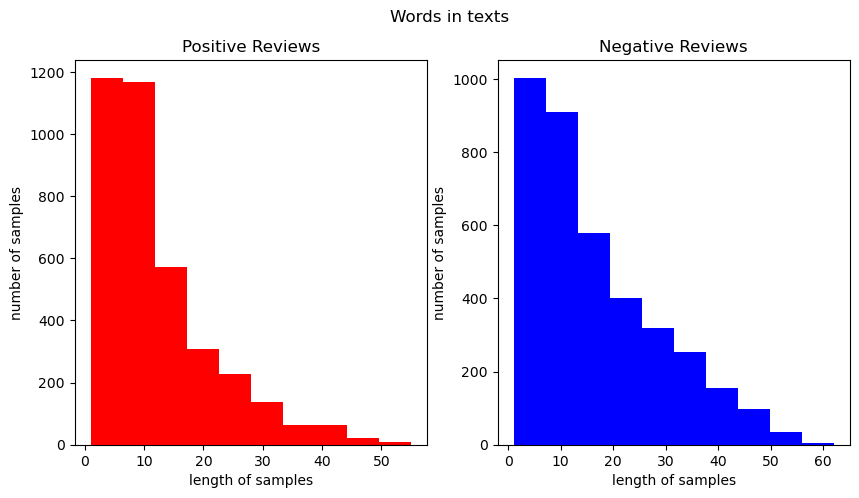

In [436]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [437]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [438]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [439]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [440]:
tokenizer.word_index

{'이': 1,
 '에': 2,
 '도': 3,
 '가': 4,
 '잘': 5,
 '너무': 6,
 '배송': 7,
 '은': 8,
 '요': 9,
 '안': 10,
 '좋아요': 11,
 '재구매': 12,
 '구매': 13,
 '는': 14,
 '다': 15,
 '을': 16,
 '으로': 17,
 '사용': 18,
 '한': 19,
 '그냥': 20,
 '로': 21,
 '제품': 22,
 '했는데': 23,
 '보다': 24,
 '가격': 25,
 '하고': 26,
 '생각': 27,
 '좀': 28,
 '같아요': 29,
 '주문': 30,
 '입니다': 31,
 '맛': 32,
 '고': 33,
 '못': 34,
 '때': 35,
 '많이': 36,
 '만': 37,
 '해서': 38,
 '더': 39,
 '들': 40,
 '를': 41,
 '별로': 42,
 '것': 43,
 'ㅠㅠ': 44,
 '개': 45,
 '합니다': 46,
 '사이즈': 47,
 '에서': 48,
 '네': 49,
 '서': 50,
 '상품': 51,
 '거': 52,
 '포장': 53,
 '다른': 54,
 '좋네요': 55,
 '냄새': 56,
 '정말': 57,
 '하나': 58,
 '했어요': 59,
 '부분': 60,
 'ㅠ': 61,
 '진짜': 62,
 '빠르고': 63,
 '조금': 64,
 '할': 65,
 '나': 66,
 '제': 67,
 '넘': 68,
 '저': 69,
 '샀는데': 70,
 '인데': 71,
 '이라': 72,
 '구입': 73,
 '좋습니다': 74,
 '좋은': 75,
 '반품': 76,
 '또': 77,
 '사진': 78,
 '두': 79,
 '정도': 80,
 'ㅎㅎ': 81,
 '해': 82,
 '만족합니다': 83,
 '완전': 84,
 '느낌': 85,
 '아주': 86,
 '좋고': 87,
 '아직': 88,
 '과': 89,
 '게': 90,
 '딱': 91,
 '써': 92,
 '아이': 93,
 '맘': 94,


In [441]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 16887
등장 빈도가 1번 이하인 희귀 단어의 수: 10083
단어 집합에서 희귀 단어의 비율: 59.70865162551075
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 9.244776146772168


In [442]:
vocab_size = total_cnt - rare_cnt + 2 # 0 패딩 토큰, OOV(사전에 없는 단어) 토큰 추가
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 6806


In [443]:
'''
나는 오늘 학교에 갔습니다

오늘이라는 단어가 vocab_size에 없을때

[0, 0, ... 5, 1, 100, 50]

vocab_size에 없는 단어 OOV
'''

'\n나는 오늘 학교에 갔습니다\n\n오늘이라는 단어가 vocab_size에 없을때\n\n[0, 0, ... 5, 1, 100, 50]\n\nvocab_size에 없는 단어 OOV\n'

In [444]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
# 토큰화 과정에서 사전에 없는 단어는 'OOV'로 표현(oov_token = 'OOV')

In [445]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [446]:
X_train

[[580, 5, 29, 1833, 236, 17, 37, 953, 66, 143, 3423, 1077],
 [63,
  43,
  199,
  4,
  43,
  34,
  2367,
  2,
  7,
  4545,
  106,
  748,
  22,
  4546,
  138,
  16,
  4547,
  92,
  3424,
  115,
  1,
  1078,
  1253,
  18,
  355,
  782,
  4548,
  224,
  2,
  7,
  37,
  209],
 [581, 94, 5, 954, 224, 17, 1254, 456, 444, 105, 343, 865, 1363, 62],
 [397,
  336,
  545,
  866,
  719,
  783,
  457,
  1,
  1,
  1255,
  2061,
  4549,
  344,
  4,
  826,
  34,
  296,
  749,
  4,
  11,
  27,
  3425,
  533],
 [13, 4550, 1503, 1, 107, 18, 31, 39, 534, 2062],
 [193, 364, 14, 1, 2795, 16],
 [6,
  2063,
  2064,
  54,
  2,
  6,
  2368,
  1834,
  169,
  2,
  123,
  3,
  1,
  1,
  4551,
  6,
  535,
  26,
  9,
  2796,
  4552,
  237,
  37,
  2062],
 [626, 2, 412, 4553, 62],
 [7, 2065, 1, 1256, 748, 458, 1, 134, 2797, 1648, 909],
 [398, 1649, 65, 1, 1835, 4554, 1, 432, 12],
 [6, 1364, 3426, 203, 329, 1],
 [627, 3, 74, 20, 2798, 1, 25, 514, 4555, 33, 2, 1, 96, 135, 1, 2369, 867, 30],
 [2370, 3, 4556, 1, 57, 1504,

In [447]:
X_test

[[82,
  26,
  469,
  675,
  56,
  82,
  152,
  6777,
  1297,
  78,
  2907,
  5623,
  498,
  149,
  82,
  4389,
  125],
 [8, 104, 1],
 [7, 12, 181, 12, 181, 12],
 [1, 1, 57, 6286],
 [43, 145, 121, 7, 1176, 135, 154, 1563],
 [1, 281, 1, 328],
 [690, 108, 1088],
 [488, 27, 12],
 [89, 185, 3440, 1311, 490, 6, 1776, 30],
 [206, 342, 1, 766, 12],
 [85, 3590, 160, 837],
 [3241, 1, 83, 1064, 456, 602, 22, 488, 47],
 [1766, 1603, 12],
 [1405, 2688, 49, 150, 6, 172, 200, 1, 991, 6, 696, 1, 239],
 [58, 264, 1475, 1724, 939, 2180, 87, 844],
 [397, 301, 533, 7, 1031, 10],
 [1,
  356,
  343,
  1056,
  2713,
  927,
  889,
  1,
  405,
  1571,
  135,
  312,
  1,
  1374,
  893,
  38,
  743,
  1,
  1069,
  255,
  2184,
  6198,
  147],
 [735, 607, 3544, 1, 138, 46, 759, 297, 760],
 [13, 615, 563, 1, 1942, 1, 806, 55, 131, 22, 157, 1900, 10],
 [1542, 311, 325, 1944, 6, 143, 1, 1794, 1, 602, 22],
 [54, 69, 358, 1338, 122, 261, 293, 2340, 276, 11, 4536, 474, 1000, 32],
 [562, 386, 515, 8, 1, 186, 1],
 [255, 

In [448]:
print(tokenizer.word_index)

{'OOV': 1, '이': 2, '에': 3, '도': 4, '가': 5, '잘': 6, '너무': 7, '배송': 8, '은': 9, '요': 10, '안': 11, '좋아요': 12, '재구매': 13, '구매': 14, '는': 15, '다': 16, '을': 17, '으로': 18, '사용': 19, '한': 20, '그냥': 21, '로': 22, '제품': 23, '했는데': 24, '보다': 25, '가격': 26, '하고': 27, '생각': 28, '좀': 29, '같아요': 30, '주문': 31, '입니다': 32, '맛': 33, '고': 34, '못': 35, '때': 36, '많이': 37, '만': 38, '해서': 39, '더': 40, '들': 41, '를': 42, '별로': 43, '것': 44, 'ㅠㅠ': 45, '개': 46, '합니다': 47, '사이즈': 48, '에서': 49, '네': 50, '서': 51, '상품': 52, '거': 53, '포장': 54, '다른': 55, '좋네요': 56, '냄새': 57, '정말': 58, '하나': 59, '했어요': 60, '부분': 61, 'ㅠ': 62, '진짜': 63, '빠르고': 64, '조금': 65, '할': 66, '나': 67, '제': 68, '넘': 69, '저': 70, '샀는데': 71, '인데': 72, '이라': 73, '구입': 74, '좋습니다': 75, '좋은': 76, '반품': 77, '또': 78, '사진': 79, '두': 80, '정도': 81, 'ㅎㅎ': 82, '해': 83, '만족합니다': 84, '완전': 85, '느낌': 86, '아주': 87, '좋고': 88, '아직': 89, '과': 90, '게': 91, '딱': 92, '써': 93, '아이': 94, '맘': 95, '다시': 96, '엄청': 97, '감사합니다': 98, '의': 99, '중': 100, '면': 101, '지': 102, '에요': 103,

리뷰의 최대 길이 : 62
리뷰의 평균 길이 : 14.542266666666666


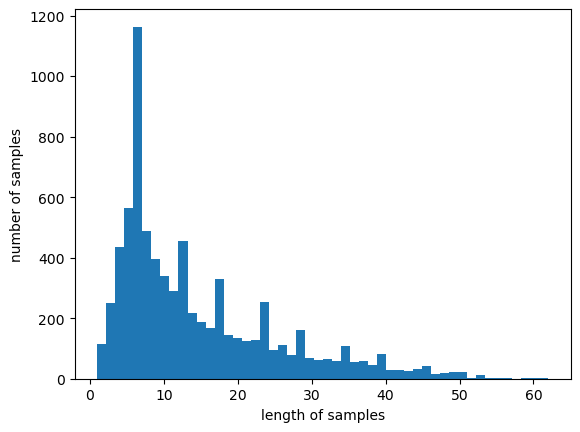

In [449]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [450]:
X_train = pad_sequences(X_train, maxlen = 51)
X_test = pad_sequences(X_test, maxlen = 51)

In [451]:
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  580,    5,   29, 1833,  236,
         17,   37,  953,   66,  143, 3423, 1077])

In [452]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [453]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [454]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [455]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.5822 - acc: 0.6925
Epoch 1: val_acc improved from -inf to 0.82867, saving model to best_model.h5
100/100 [==============================] - 6s 44ms/step - loss: 0.5822 - acc: 0.6925 - val_loss: 0.4296 - val_acc: 0.8287
Epoch 2/15
  3/100 [..............................] - ETA: 3s - loss: 0.3975 - acc: 0.8556

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 99/100 [============================>.] - ETA: 0s - loss: 0.3429 - acc: 0.8650
Epoch 2: val_acc improved from 0.82867 to 0.85867, saving model to best_model.h5
100/100 [==============================] - 4s 36ms/step - loss: 0.3423 - acc: 0.8653 - val_loss: 0.3528 - val_acc: 0.8587
Epoch 3/15
 99/100 [============================>.] - ETA: 0s - loss: 0.2535 - acc: 0.9086
Epoch 3: val_acc did not improve from 0.85867
100/100 [==============================] - 4s 36ms/step - loss: 0.2538 - acc: 0.9080 - val_loss: 0.3497 - val_acc: 0.8573
Epoch 4/15
 99/100 [============================>.] - ETA: 0s - loss: 0.2027 - acc: 0.9323
Epoch 4: val_acc improved from 0.85867 to 0.87000, saving model to best_model.h5
100/100 [==============================] - 4s 36ms/step - loss: 0.2026 - acc: 0.9325 - val_loss: 0.3739 - val_acc: 0.8700
Epoch 5/15
 99/100 [============================>.] - ETA: 0s - loss: 0.1703 - acc: 0.9438
Epoch 5: val_acc did not improve from 0.87000
100/100 [==================

In [456]:
loaded_model = load_model('best_model.h5')

In [458]:
loaded_model.evaluate(X_test, y_test)[1]

79/79 [==============================] - 1s 12ms/step - loss: 0.3775 - acc: 0.8660


0.8659999966621399

In [ ]:
'''
이 제품 너무 좋은데요. 정말 좋아요. 강추합니다. => 긍정/부정 출력

이것도 상품인가요? 정말 화가 납니다. 분노가 치밀어요. 개짜증납니다. => 긍정/부정 출력

def sentiment_predict(new_sentence):
    한글. 공백 제외한 나머지 제거, 토큰화, 불용어 제거, 정수 인코딩, 패팅, 예측
    pass
    


def sentiment_predict(이 제품 너무 좋은데요. 정말 좋아요. 강추합니다.)

def sentiment_predict(이것도 상품인가요? 정말 화가 납니다. 분노가 치밀어요. 개짜증납니다.)
'''